In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import sparse as sps

In [ ]:
%%bash

cargo run --release --example sample -- --out test --degree 100 \
  --nvertices 1000000 --seed 1234

In [ ]:
%%bash
for nthreads in 1 2 4 8 16 32 ; do
RAYON_NUM_THREADS="$nthreads" cargo run --release --example color -- --graph test.* --nsamples 10000000 \
    --frequency 1000000 --out /dev/null --out-times /dev/null --seed 1 | grep conflict_percent
done | jq -s . > /tmp/out 2>/dev/null

In [12]:
df = pd.read_json('/tmp/out')

In [13]:
df['steps_times'] = df.apply(lambda x: list(zip(x.steps, x.times)), axis=1)
edf = df.explode('steps_times')
edf['steps'] = edf.steps_times.apply(lambda x: x[0])
edf['times'] = edf.steps_times.apply(lambda x: x[1])

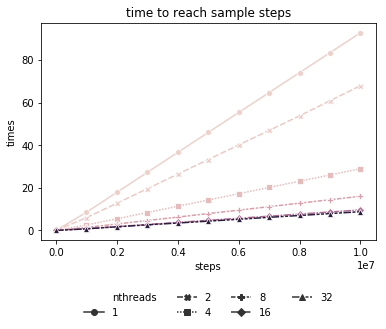

In [39]:
g = sns.lineplot(data=edf, x='steps', y='times', hue='nthreads', style='nthreads', markers=True, legend='brief')

handles, labels = plt.gca().get_legend_handles_labels()
ixs=[0, 5, 6, 7, 8, 9, 10]
handles = [handles[ix] for ix in ixs]
labels = [labels[ix] for ix in ixs]
plt.gca().legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -.2), ncol=4, frameon=False)

plt.title('time to reach sample steps')

plt.savefig('scale.png',  bbox_inches='tight')
plt.show()

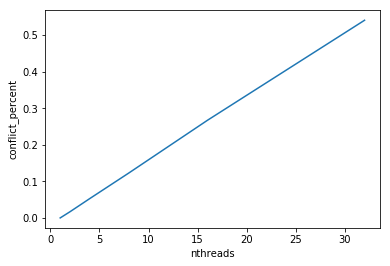

In [35]:
sns.lineplot(data=df, x='nthreads', y='conflict_percent')
plt.savefig('conflict.png',  bbox_inches='tight')
plt.show()